# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammad Javad Nasrolahi   
2.   Student Number: 400206379


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [31]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [32]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
x_train = np.array(dataset.iloc[:int(dataset.shape[0] * 0.8), 1]).reshape(-1, 1)
y_train = np.array(dataset.iloc[:int(dataset.shape[0] * 0.8), 2]).reshape(-1, 1)

y_test = np.array(dataset.iloc[int(dataset.shape[0] * 0.8):, 2]).reshape(-1, 1)
x_test = np.array(dataset.iloc[int(dataset.shape[0] * 0.8):, 1]).reshape(-1, 1)


In [33]:
x_train.shape

(400, 1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [34]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

print(f"x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}")
A = np.hstack([x_train, np.ones(x_train.shape)])
m = np.linalg.lstsq(A, y_train, rcond=None)[0]
print(f"m: {m}")

x_train.shape: (400, 1), y_train.shape: (400, 1)
m = [[-1.02641738]
 [ 0.81500634]]


In [9]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

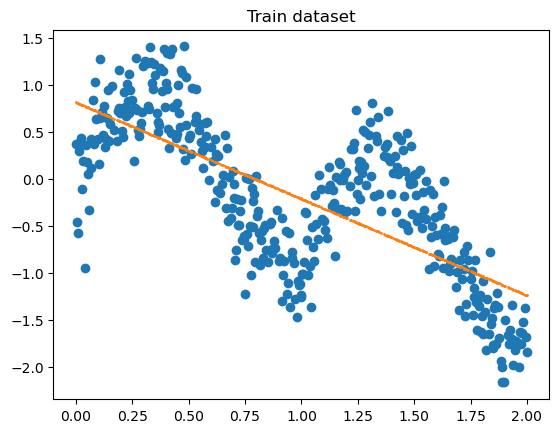

In [10]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

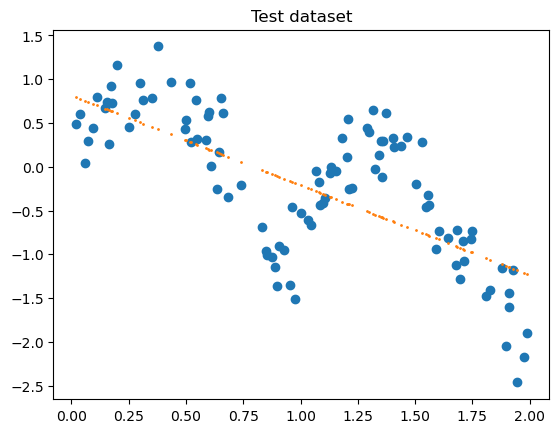

In [11]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

به خاطر این که داده‌ها حدودا در بازه‌ی -۲.۵ تا ۱.۵ هستند این مقدار از خطا قابل پذیرش نیست 
علت اصلی این خطا این است که داده‌ها خطی نیستند و خطی نبودن داده‌ها باعث می‌شود خطی که ما در اینجا پیدا کردیم به داده‌ها نزدیک نباشد

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

احتمال خطا در این قسمت احتمالا کمتر است چون بصورت محلی داده‌های تست رو تخمین میزند

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [12]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.linalg.norm(xi - the_query_point) ** 2 / (2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [15]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(X.T * (W * X)) * X.T * W * train_Y
    return float(qx * theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [16]:
predicted_test = [predict(x_train, y_train, query, 0.01) for query in x_test]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

/Users/javad/opt/anaconda3/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.09575447403730422


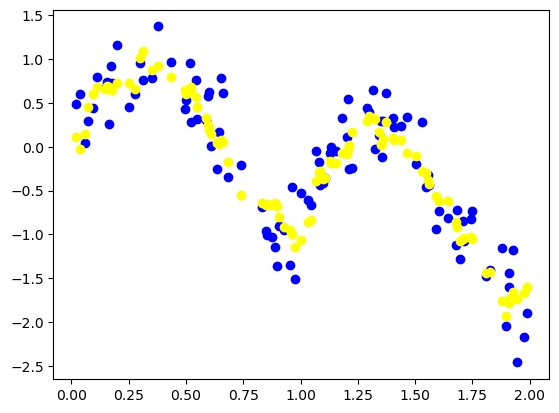

In [17]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

چون تابع هزینه در این مدل به داده های محلی بیشتر توجه میکند کارایی این مدل بیشتر از مدل قبلی است

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

چون در قسمت قبل هم به داده‌هایی محلی در تابع هزینه توجه میشد انتظار کارایی حدودا شبیه به قسمت قبل باشد

### Part10:
Implementing the `KNN model`.

In [18]:
from numpy import indices


class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        # implement the distance function
        distance = np.sqrt(np.sum((x1 - x2) ** 2, axis=1))
        return distance

    def return_nn_ids(self, x):
        # find indices of k nearest neighbours to x
        indices = []
        distances = self.distance(self.X, x)
        for i in range(self.k):
            indices.append(np.argmin(distances))
            distances[indices[i]] = np.inf
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [19]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [29]:
# for k in range(1, 15):
#     error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
#     print(f"MSE error of KNN for test dataset: {error_knn}")
k = 4 
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.0970987251692341


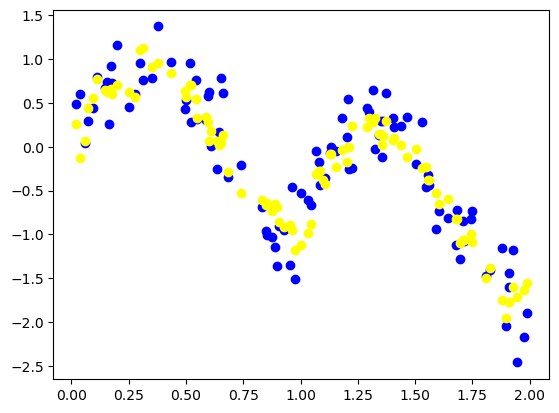

In [30]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

کارایی این مدل خیلی شبیه به مدل قبلیه و MSE یه کم با مدل قبلی متفاوته